In [1]:
import numpy as np
import random

In [2]:
def sample_gmm_2d(K, C, N):
    X = np.zeros((K*N, 2), dtype=float)
    Y = np.zeros((K*N), dtype=float)
    for i in range(K):
        mean = np.random.uniform(-10, 10)
        sigma = np.random.uniform(0, 5)
        c_i = random.sample(range(C), 1)
        for j in range(N):
            X[i*N+j] = np.random.uniform(mean, sigma, 2)
            Y[i*N+j] = c_i[0]
    return (X, Y)

In [3]:
(X, Y) = sample_gmm_2d(4, 2, 30)
print(Y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
import matplotlib
import matplotlib.pyplot as plt

def graph_data(X, Y_, Y):
    X_correct_0 = X[np.logical_and(Y == Y_, Y_ == np.zeros(Y_.shape)), :]
    X_correct_1 = X[np.logical_and(Y == Y_, Y_ == np.ones(Y_.shape)), :]
    X_wrong_0 = X[np.logical_and(Y != Y_, Y_ == np.zeros(Y_.shape)), :]
    X_wrong_1 = X[np.logical_and(Y != Y_, Y_ == np.ones(Y_.shape)), :]
    plt.scatter(X_correct_0[:, 0], X_correct_0[:, 1], marker='o', c='gray')
    plt.scatter(X_correct_1[:, 0], X_correct_1[:, 1], marker='o', c='white')
    plt.scatter(X_wrong_0[:, 0], X_wrong_0[:, 1], marker='s', c='gray')
    plt.scatter(X_wrong_1[:, 0], X_wrong_1[:, 1], marker='s', c='white')

In [5]:
def myDummyDecision(X):
    score = X[:,0] + X[:,1] - 5
    return score

(array([-0.68092579, -0.45784491]), array([ 6.87898989,  6.40313405]))


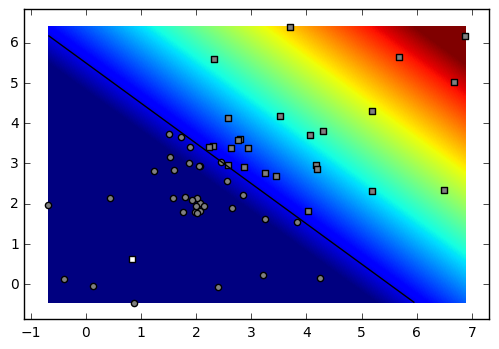

In [8]:
def graph_surface(fun, rect, offset=0.0, width=1000, height=1000):
    x1 = np.linspace(rect[0][0], rect[1][0], height)
    x2 = np.linspace(rect[0][1], rect[1][1], width)
    xx, yy = np.meshgrid(x1, x2)
    h = fun(np.stack([xx.flatten(), yy.flatten()], axis=1))
    h = h.reshape(xx.shape)
    plt.contour(xx, yy, h, colors='black', levels=[offset])
    norm = matplotlib.colors.Normalize(vmin=offset+min(rect[0][0], rect[0][1]),vmax=offset+max(rect[1][0], rect[1][1]))
    plt.pcolormesh(xx, yy, h, norm=norm)
    graph_data(X, Y, fun(X) > offset)
    plt.show()

bbox = (np.min(X, axis=0), np.max(X, axis=0))
print(bbox)
graph_surface(myDummyDecision, bbox, offset=0.5)

[[-0.18966839 -0.83800533 -0.74053415 -1.47059097 -0.30082104]
 [ 1.15095725 -1.12041728 -0.62361848 -1.18367578 -0.59579099]] [[ 0.  0.  0.  0.  0.]] [[-0.57238275 -0.61322272]
 [-1.37319041  0.28650664]
 [-0.0793543   1.1028435 ]
 [ 0.458234   -0.18201609]
 [-0.58868908  1.70950022]] [[ 0.  0.]]
iteration 0: loss 2.6579269313374483
iteration 10: loss 2.6502072228656877
iteration 20: loss 2.6425040973189775
iteration 30: loss 2.6348174307764167
iteration 40: loss 2.6271471004819653
iteration 50: loss 2.619492984835515
iteration 60: loss 2.611854963384035
iteration 70: loss 2.6042329168128404
iteration 80: loss 2.596626726936933
iteration 90: loss 2.5890362766924566
iteration 100: loss 2.581461450128218
iteration 110: loss 2.573902132397295
iteration 120: loss 2.5663582097487407
iteration 130: loss 2.5588295695193506
iteration 140: loss 2.551316100125498
iteration 150: loss 2.543817691055066
iteration 160: loss 2.536334232859421
iteration 170: loss 2.528865617145473
iteration 180: loss

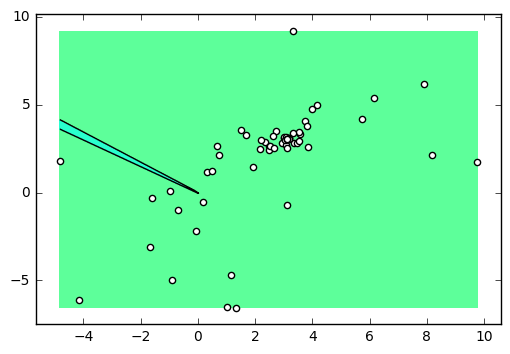

In [11]:
import data
import fcann2

(X, Y_) = data.sample_gmm_2d(6, 2, 10)
W1, b1, W2, b2 = fcann2.fcann2_train(X, Y_)
classify = fcann2.fcann2_classify(W1, b1, W2, b2)
Y = classify(X)
bbox = (np.min(X, axis=0), np.max(X, axis=0))
graph_surface(classify, bbox)